Ejercicio 2.C
Siguiendo con los datos anteriores y suponiendo que el umbral es 0.5:

y_true=np.array([1,0,1,0,0,0,1,0,1,1,1,1,0])
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])

Calcula directamente las siguientes métricas:

Prevalencia
Sensibilidad
Especificidad
VPP
VPN

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [12]:
def get_metrics(tp, tn, fp, fn):
    prevalence = (tp + fn) / (tp + tn + fp + fn)
    sensibility = tp / (tp + fn)
    specificity = tn / (fp + tn)

    return prevalence, sensibility, specificity

In [13]:
def get_precision_bayes(sensibility, specificity, prevalence):
    return (sensibility * prevalence) / (sensibility * prevalence + (1 - specificity) * (1 - prevalence))

In [14]:
def get_vpn_bayes(sensibility, specificity, prevalence):
    return (specificity * (1 - prevalence)) / (specificity * (1 - prevalence) + (1 - sensibility) * prevalence)

In [15]:
y_true = np.array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])
y_score = np.array([0.27, 0.45, 0.76, 0.55, 0.28, 0.04, 0.34, 0.4, 0.66, 0.88, 0.94, 0.47, 0.2])

In [16]:
y_pred = y_score >= .5

tp = sum(y_pred & y_true)
tn = sum(~y_pred & ~y_true)
fp = sum(y_pred & ~y_true)
fn = sum(~y_pred & y_true)

In [17]:
my_prevalence, sensibility, specificity = get_metrics(tp, tn, fp, fn)

prevalences = np.linspace(0, 1, 1_000)
precisions = get_precision_bayes(sensibility, specificity, prevalences)
vpns = get_vpn_bayes(sensibility, specificity, prevalences)

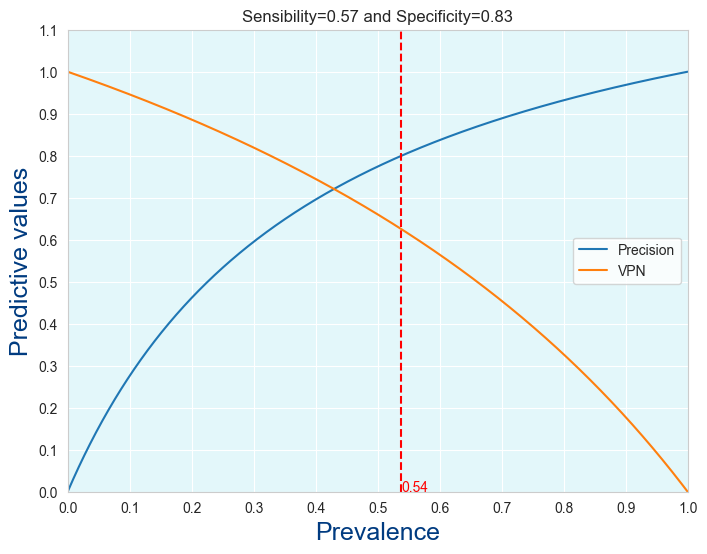

In [51]:
figure = plt.figure(figsize=(8, 6))
axe = figure.add_subplot(1, 1, 1)

axe.plot(prevalences, precisions, label='Precision')
axe.plot(prevalences, vpns, label="VPN")

axe.set_title(f'Sensibility={sensibility:.2f} and Specificity={specificity:.2f}')

axe.set_xlabel('Prevalence',  c='#003B80', fontsize=18)
axe.xaxis.set_major_locator(MultipleLocator(0.1))
axe.set_xlim(xmin=0, xmax=1.0)
axe.axvline(my_prevalence, color='r', linestyle='--')
axe.text(my_prevalence, 0, f'{my_prevalence:.2f}', color='r') 

axe.yaxis.set_major_locator(MultipleLocator(0.1))
axe.set_ylim(ymin=0, ymax=1.1)
axe.set_ylabel('Predictive values', c='#003B80', fontsize=18)

axe.grid(color='white')
axe.set_facecolor('#E3F7FA')

axe.legend()